Примечания к задачам:

Необходимо использовать модуль numpy
Все данные должны считываться из файла в виде массива numpy
Результаты необходимо сохранять в файл
#### Задача 1
- Дано множество из p матриц (n,n) и множество из p векторов (n,1). Написать функцию для рассчета суммы p произведений матриц (результат имеет размерность (n,1))

#### Задача 2
- Написать функцию преобразовывающую вектор чисел в матрицу бинарных представлений.

#### Задача 3
- Написать функцию, которая возвращает все уникальные строки матрицы

#### Задача 4
- Написать функцию, которая заполняет матрицу с размерами (M,N) случайными числами распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов, а также строит для каждой строки стоит гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

#### Задача 5
- Написать функцию, которая заполняет матрицу (M,N) в шахматном порядке заданными числами a и b.

#### Задача 6
- Написать функцию, которая возвращает тензор представляющий изображение круга с заданным цветом и радиусом в схеме rgd на черном фоне.

#### Задача 7
- Написать функцию, которая стандартизирует все значения тензор (отнять мат. ожидание и поделить на СКО)

#### Задача 8
- Написать функцию, выделяющую часть матрицы фиксированного размера с центром в данном элементе (дополненное значением fill если необходимо)

#### Задача 9
- Написать функцию, которая находит самое часто встречающееся число в каждой строке матрицы и возвращает массив этих значений

#### Задача 10
- Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Написать функцию, которая складывает каналы изображения с указанными весами, и возвращает результат в виде матрицы размера (height, width)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sum_multi(path_to_set_m, path_to_set_v, n=4, p=3):
    dim: int = n
    set_m = np.genfromtxt(path_to_set_m, dtype=int, delimiter=',')
    set_v = np.genfromtxt(path_to_set_v, dtype=int, delimiter=',')
    result = np.zeros([dim,1], dtype=int)
    
    for i in range(p):
        inter_M = set_m[n-4:n]
        inter_V = set_v[n-4:n].reshape([dim,1])
        
        intermediate = np.tensordot(inter_M, inter_V, axes=1)
        result = np.add(result, intermediate)
        
        n += 4
        
    return result


In [3]:
sum_multi('data/data_M.csv', 'data/data_V.csv')

array([[1682],
       [1946],
       [2210],
       [2474]])

#### Задача 2
- Написать функцию преобразовывающую вектор чисел в матрицу бинарных представлений.

In [4]:
def create_bin_matrix(path_to_vector):
    vector = np.genfromtxt(path_to_vector, dtype=int, delimiter=',').reshape([-1,1])
    max_bit = np.ceil(np.log2(np.max(vector))).astype(int)
    
    B = ((vector & (2**np.arange(max_bit))) != 0).astype(int)
    return B

In [5]:
create_bin_matrix('data/data_vector.csv')

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1]])

#### Задача 3
- Написать функцию, которая возвращает все уникальные строки матрицы

In [6]:
def find_unique_lines(path_to_matrix):
    matrix = np.genfromtxt(path_to_matrix, dtype=int, delimiter=',')
    unique = np.unique(matrix, axis=0)
    return unique

In [7]:
find_unique_lines('data/data_m_ununiq.csv')

array([[0, 1, 2, 3],
       [0, 1, 2, 4],
       [0, 1, 3, 2]])

#### Задача 4
- Написать функцию, которая заполняет матрицу с размерами (M,N) случайными числами распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов, а также строит для каждой строки стоит гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [17]:
def funny_normal_matrix(N: int = 10, M: int = 10):
    A = np.random.normal(0, 1, size=(N, M))
    A_T = A.transpose()

    fig, axes = plt.subplots(N, 1, figsize=(3,25))
    for i in range(10):
        print(f'Мат. ожидание {i} столбца {np.sum(A_T) / len((A_T))}')
        print(f'Дисперсия {i} столбца {A_T[i].var()}')
        sns.histplot(A[i], ax=axes[i], bins=int(M * 0.5))
    return A

Мат. ожидание 0 столбца 0.049443087908058285
Дисперсия 0 столбца 1.1455676145939486
Мат. ожидание 1 столбца 0.049443087908058285
Дисперсия 1 столбца 0.09393155726970671
Мат. ожидание 2 столбца 0.049443087908058285
Дисперсия 2 столбца 0.7408429943721153
Мат. ожидание 3 столбца 0.049443087908058285
Дисперсия 3 столбца 1.4287900949326087
Мат. ожидание 4 столбца 0.049443087908058285
Дисперсия 4 столбца 0.3767470698649437
Мат. ожидание 5 столбца 0.049443087908058285
Дисперсия 5 столбца 0.5490713069047827


IndexError: index 5 is out of bounds for axis 0 with size 5

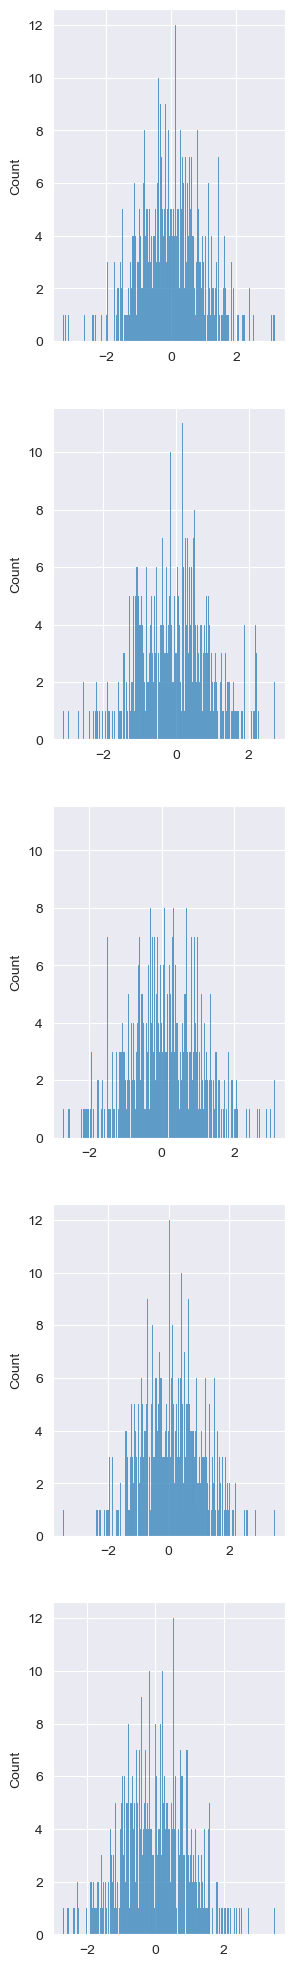

In [18]:
A = funny_normal_matrix(N=5, M=1000)

#### Задача 5
- Написать функцию, которая заполняет матрицу (M,N) в шахматном порядке заданными числами a и b.

In [25]:
def chess_matrix(M: int = 5, N: int = 5, a: int = 0, b: int = 1):
    matrix = np.array([[a if (i+j) % 2 else b for i in range(M)] for j in range(N)])
    return matrix

In [27]:
chess_matrix(M=10, N=10, b=10)

array([[10,  0, 10,  0, 10,  0, 10,  0, 10,  0],
       [ 0, 10,  0, 10,  0, 10,  0, 10,  0, 10],
       [10,  0, 10,  0, 10,  0, 10,  0, 10,  0],
       [ 0, 10,  0, 10,  0, 10,  0, 10,  0, 10],
       [10,  0, 10,  0, 10,  0, 10,  0, 10,  0],
       [ 0, 10,  0, 10,  0, 10,  0, 10,  0, 10],
       [10,  0, 10,  0, 10,  0, 10,  0, 10,  0],
       [ 0, 10,  0, 10,  0, 10,  0, 10,  0, 10],
       [10,  0, 10,  0, 10,  0, 10,  0, 10,  0],
       [ 0, 10,  0, 10,  0, 10,  0, 10,  0, 10]])

#### Задача 6
- Написать функцию, которая возвращает тензор представляющий изображение круга с заданным цветом и радиусом в схеме rgd на черном фоне.

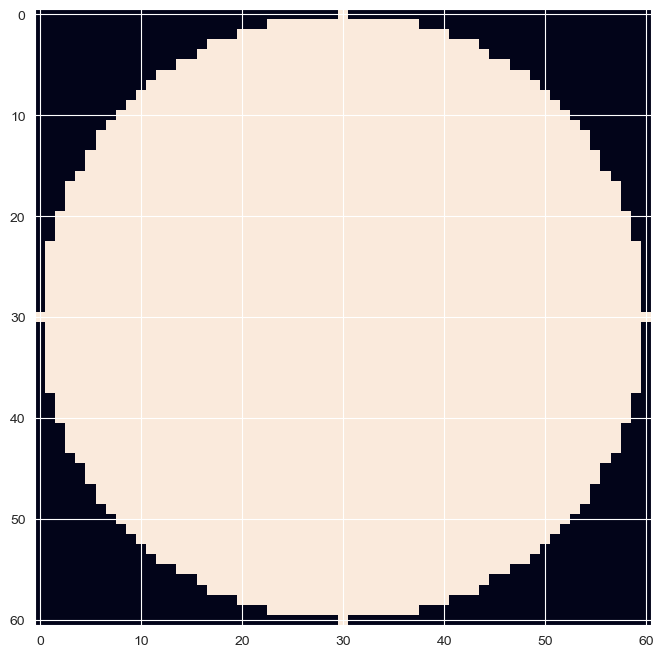

In [173]:
import matplotlib.pyplot as plt
rgb_image = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8)
r = 30

xx, yy = np.mgrid[-r:r+1, -r:r+1]
circle = xx**2 + yy**2 <= r**2

i = slice(max(100-r,0), min(100+r+1, arr.shape[0]))
j = slice(max(100-r,0), min(100+r+1, arr.shape[1]))


ci = slice(abs(min(100-r, 0)), circle.shape[0] - abs(min(arr.shape[0]-(100+r+1), 0)))
cj = slice(abs(min(100-r, 0)), circle.shape[1] - abs(min(arr.shape[1]-(100+r+1), 0)))

circ = circle[ci, cj]


plt.figure(figsize=(8,8))
plt.imshow(circ)
plt.show()

#### Задача 7
- Написать функцию, которая стандартизирует все значения тензор (отнять мат. ожидание и поделить на СКО)

In [212]:
def standard(path_to_vector):
    tensor = np.genfromtxt(path_to_vector, dtype=int, delimiter=',')
    result = np.array(list(map(lambda x: (x - (np.sum(tensor)/len(tensor))) - np.std(tensor), tensor)))
    return result, type(result)

In [213]:
standard('data/data_vector.csv')

(array([-51.71403669, -50.71403669, -49.71403669, -48.71403669,
        -47.71403669, -46.71403669, -45.71403669, -44.71403669,
        -43.71403669, -42.71403669,  77.28596331]),
 numpy.ndarray)

#### Задача 8
- Написать функцию, выделяющую часть матрицы фиксированного размера с центром в данном элементе (дополненное значением fill если необходимо)

In [302]:
def slice_cube(center = (1, 1), M = 1, N = 1, cut:bool = False, MATRIX_path='data/data_matrix.csv'):
    matrix = np.zeros([M+N * 5, M+N * 5])
    x, y = center
    
    matrix[x-M:x+N+1, y-N:y+N+1] = 1

    if cut:
        MATRIX_cut = np.genfromtxt(MATRIX_path, dtype=int, delimiter=',')
        return MATRIX_cut, MATRIX_cut[x-M:x+M+1, y-N:y+N+1]
     
    else:
        return matrix
    
    
    

In [303]:
slice_cube(center = (10, 10), M = 5, N = 5)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1

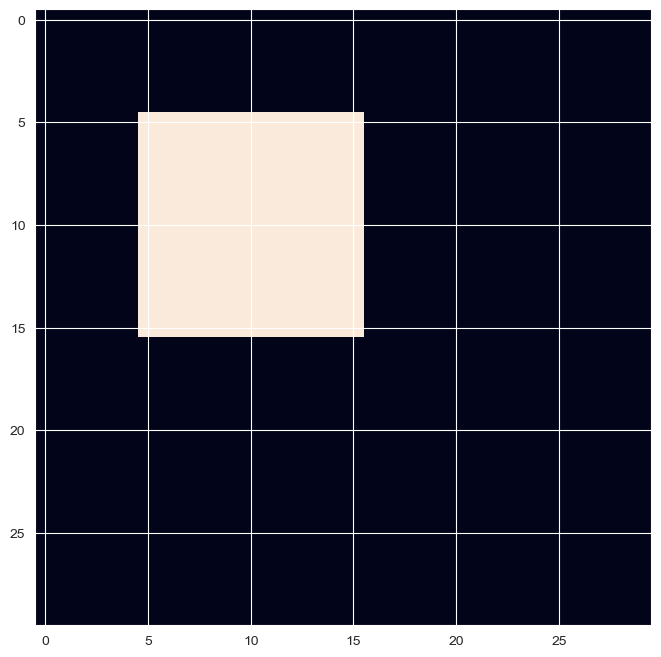

In [304]:
plt.figure(figsize=(8,8))
plt.imshow(slice_cube(center=(10,10), M=5, N=5))
plt.show()

In [310]:
M, M_c = slice_cube(cut=True, center=(3, 2), M=2, N=2)
M

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [311]:
M_c

array([[ 6,  7,  8,  9, 10],
       [12, 13, 14, 15, 16],
       [18, 19, 20, 21, 22],
       [24, 25, 26, 27, 28],
       [30, 31, 32, 33, 34]])

Задача 10
- Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Написать функцию, которая складывает каналы изображения с указанными весами, и возвращает результат в виде матрицы размера (height, width)

In [375]:
img = plt.imread('data/cat.jpg')
rand = np.random.randint(0,256, [5, 5, 3], dtype=np.uint8)


In [376]:
img.shape

(713, 920, 4)

In [371]:
def injection(img, Q):
    return (img * Q).astype(np.uint8)
    

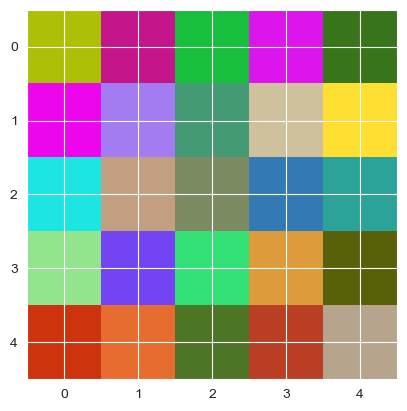

In [372]:
plt.imshow(rand)

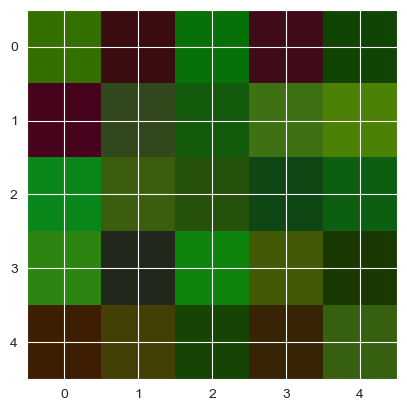

In [374]:
weights = np.array([0.299, 0.587, 0.114])
w = np.array([0.5, 0.5, 0.5])
plt.imshow(injection(rand, weights))

In [378]:
P = [1071, 445, 321,193,138,91,72,50]
for p in P:
    print(p / 60)

17.85
7.416666666666667
5.35
3.216666666666667
2.3
1.5166666666666666
1.2
0.8333333333333334


In [379]:
P = [1250, 476,274,208,154,97,59,48]
for p in P:
    print(p / 60)

20.833333333333332
7.933333333333334
4.566666666666666
3.466666666666667
2.566666666666667
1.6166666666666667
0.9833333333333333
0.8


In [382]:
P = list(map(lambda x: x / 60, [1704, 607, 365, 262, 202, 152, 157, 125]))
r = [15, 20, 40, 60, 80, 70, 80, 90]


[28.4,
 10.116666666666667,
 6.083333333333333,
 4.366666666666666,
 3.3666666666666667,
 2.533333333333333,
 2.6166666666666667,
 2.0833333333333335]

Text(0, 0.5, 'ППЭ без экрана, мкВт/см^2 ')

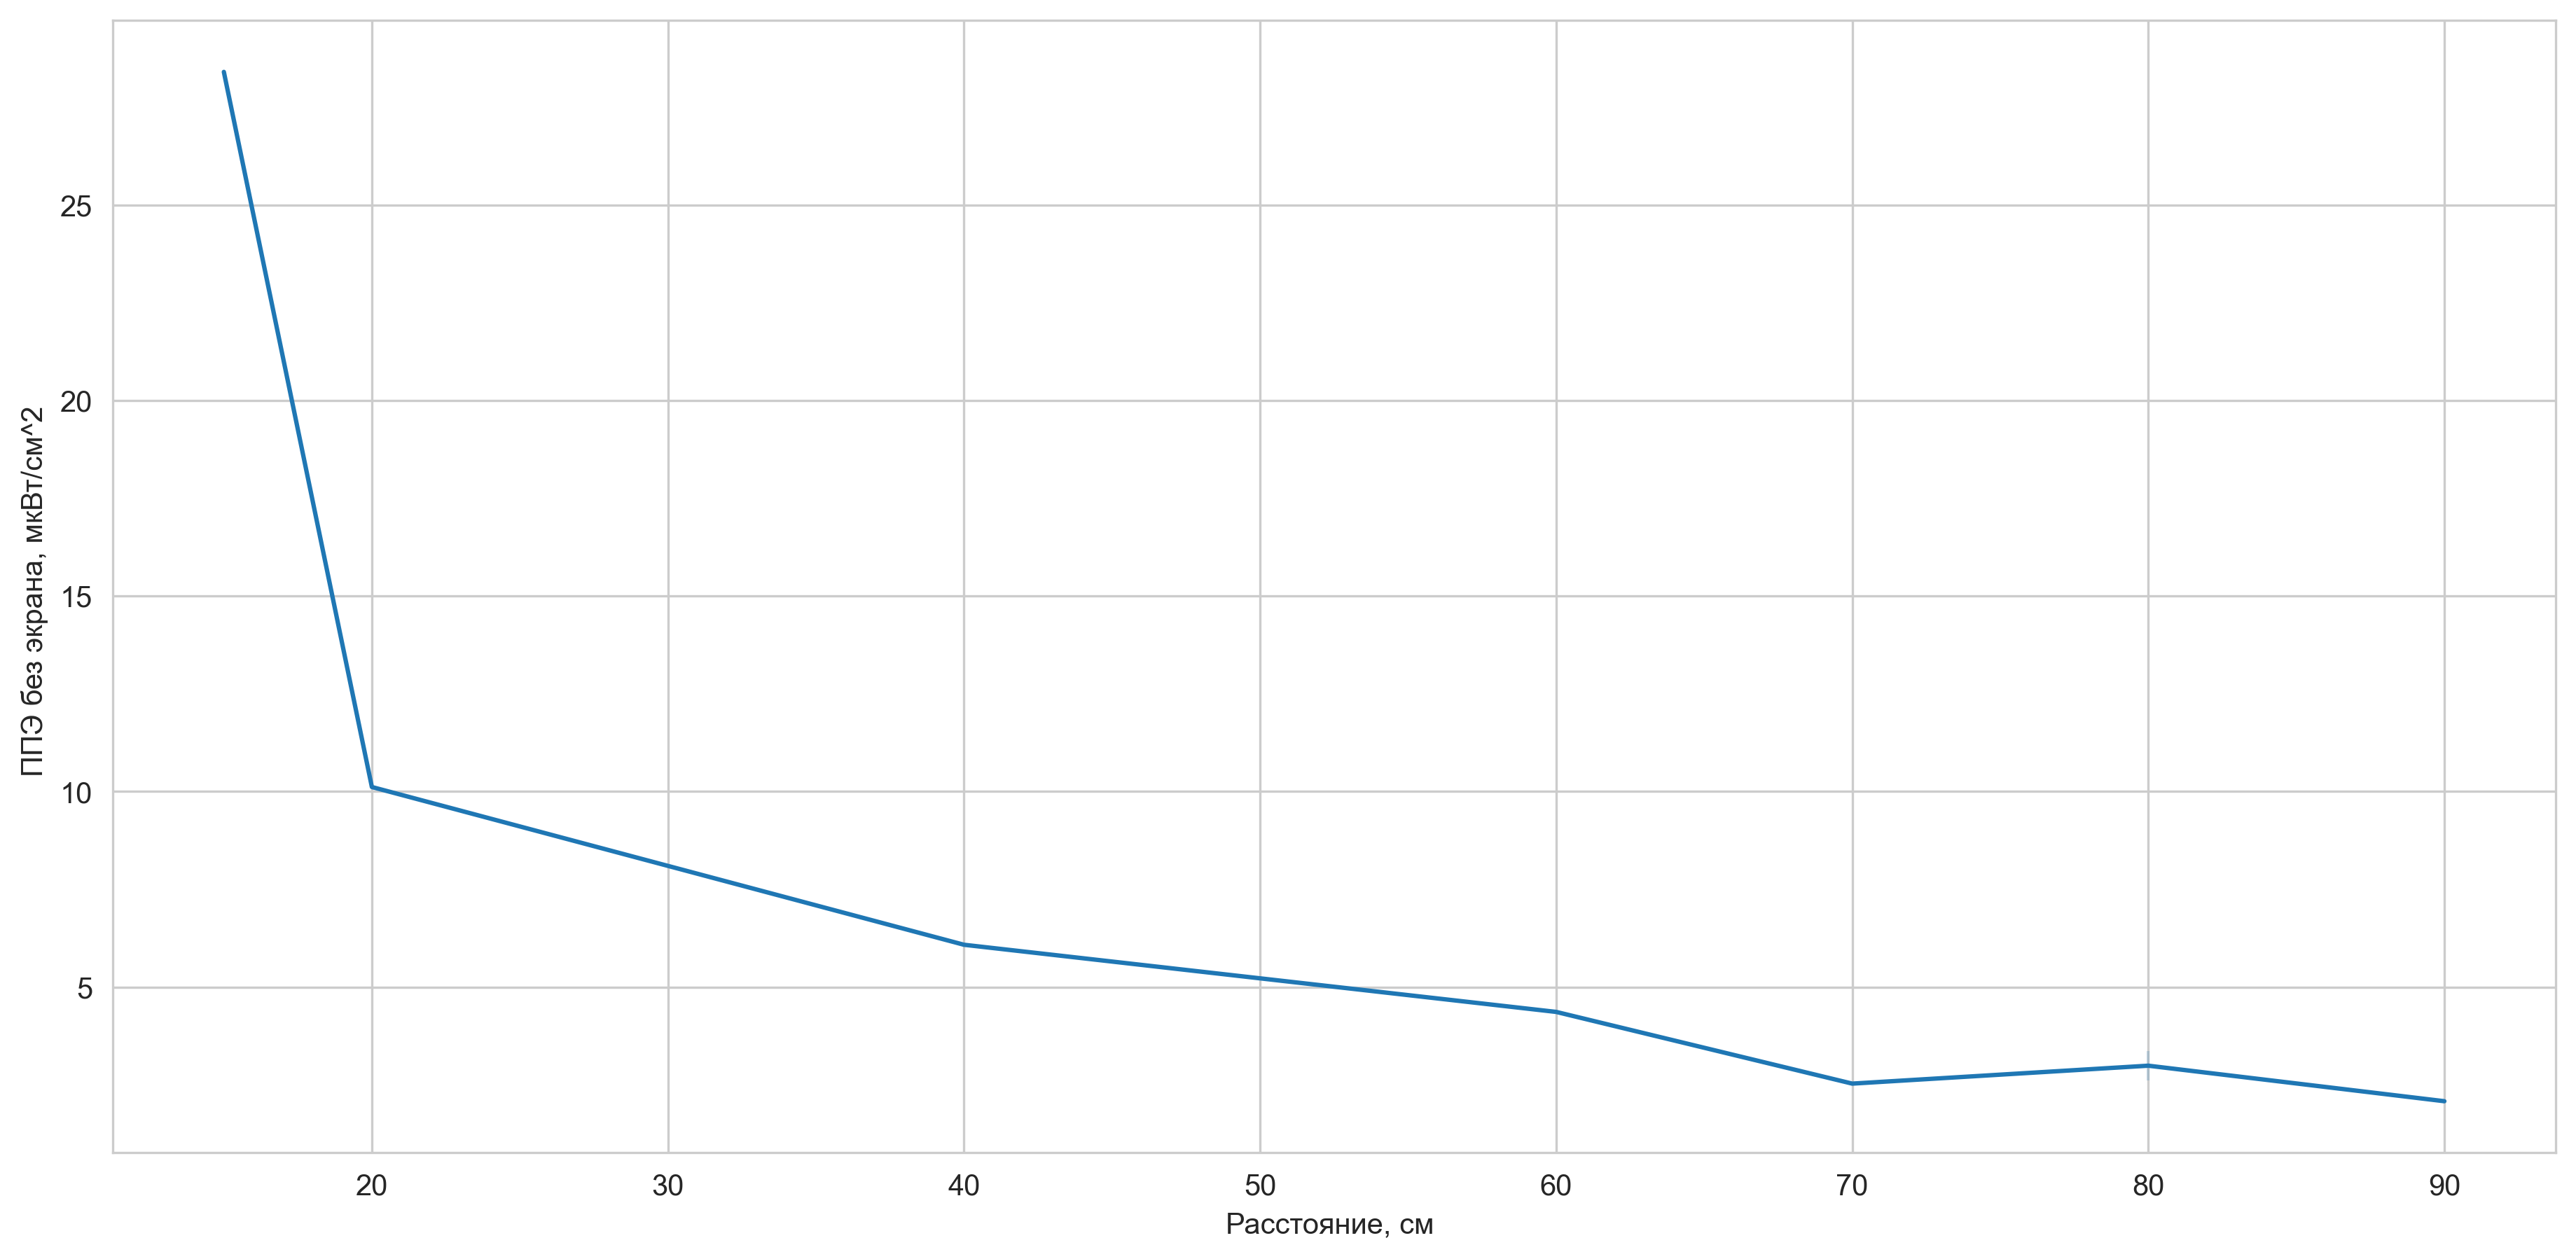

In [386]:
fig = plt.figure(figsize=(15, 7), dpi=300)
sns.lineplot(x=r, y=P)

plt.xlabel('Расстояние, см ')
plt.ylabel('ППЭ без экрана, мкВт/см^2 ')